<a href="https://colab.research.google.com/github/mdr356/NLP-Reviews-Sentiment-ML/blob/master/NLP_Reviews_Sentiment_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

datasets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB_datasets.csv')
datasets.head()

,review,sentiment,labels
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [9]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# x_train feature (input)
# y is the labels (output)

X_train = datasets['review'].tolist()
y_train = datasets['labels'].tolist()

# numpy is more light weigth.
X_train = np.array(X_train)
y_train = np.array(y_train)

# 80% training
X_train = X_train[:int(len(X_train)*0.8)]
y_train = y_train[:int(len(y_train)*0.8)]

# 20% test
X_test = X_train[int(len(X_train)*0.8):]
y_test = y_train[int(len(y_train)*0.8):]

# word index
MAX_VOCAB_SIZE = 1000
OOV_TOKEN = '<OOVV>'
MAX_LEN = 100
PADDING = 'post'
TRUNCATING = 'post'

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(X_train)
X_train_word_index = tokenizer.word_index # give each word a number
# create the sequence
X_train_sequences = tokenizer.texts_to_sequences(X_train)
# all sequence are same length
X_train_padding = pad_sequences(X_train_sequences, maxlen=MAX_LEN, padding=PADDING, truncating=TRUNCATING)
print(X_train_padding[:3])

X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padding = pad_sequences(X_test_sequences, padding=PADDING, truncating=TRUNCATING, maxlen=MAX_LEN)
print(X_test_padding[:3])


[[ 28   5   2  81   1  46   1  13 101 148  40 317   1 410 460  27   1  34
   24 201  15  12   7 615  49 607  17  69   8   8   2  88 149  13   1  69
   42   1  14  93   1   3   1 135   5 570  61 272   9 201  37   2 674 140
    1  69  12   7  22   4 119  16   2   1   1  39   1  12 119   1  55   1
   17   1   6   1 378  39 570  93   7   1   9   2 361 354   5   2 674   8
    8  10   7 432   1  15  13   7   2   1]
 [  4 395 121 355   8   8   2   1   1   7  53   1  53 157  56   1   1   3
  413   4   1   3 531   1 281   5   1   6   2 444 411   8   8   2 150  24
  569  70   1 505   1  22  62  46 192  30   2   1  19  29  46  30   2   1
  176   1  97  23  67 372  64   2   1 792   1  32   2   1   6   1   1   1
   22  62   7  10  70 276   2 148  19  10   7   4   1 408   3   1 411   4
    1 355  42  28   5   2  78   1   5 203]
 [ 11 191  12  14   4 395  96   6   1  56  21   4  97 874   1   1   1   9
    2 898   1 761   3 148   4 653   1 203   2 111   7   1  19   2 409   7
    1   3   2 103  24   1 

In [17]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(MAX_VOCAB_SIZE, 16, input_length=MAX_LEN),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train_padding, y_train, epochs=100, validation_data=(X_test_padding, y_test),
                    callbacks=[early_stopping])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6402 - loss: 0.5954 - val_accuracy: 0.8111 - val_loss: 0.4087
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8132 - loss: 0.4037 - val_accuracy: 0.8541 - val_loss: 0.3447
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8514 - loss: 0.3473 - val_accuracy: 0.8885 - val_loss: 0.2809
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8773 - loss: 0.2938 - val_accuracy: 0.9144 - val_loss: 0.2393
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8992 - loss: 0.2553 - val_accuracy: 0.9296 - val_loss: 0.1997
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9168 - loss: 0.2205 - val_accuracy: 0.9427 - val_loss: 0.1771
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9352 - loss: 0.1852 - val_accuracy: 0.9507 - val_loss: 0.1523
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9441 - loss: 0

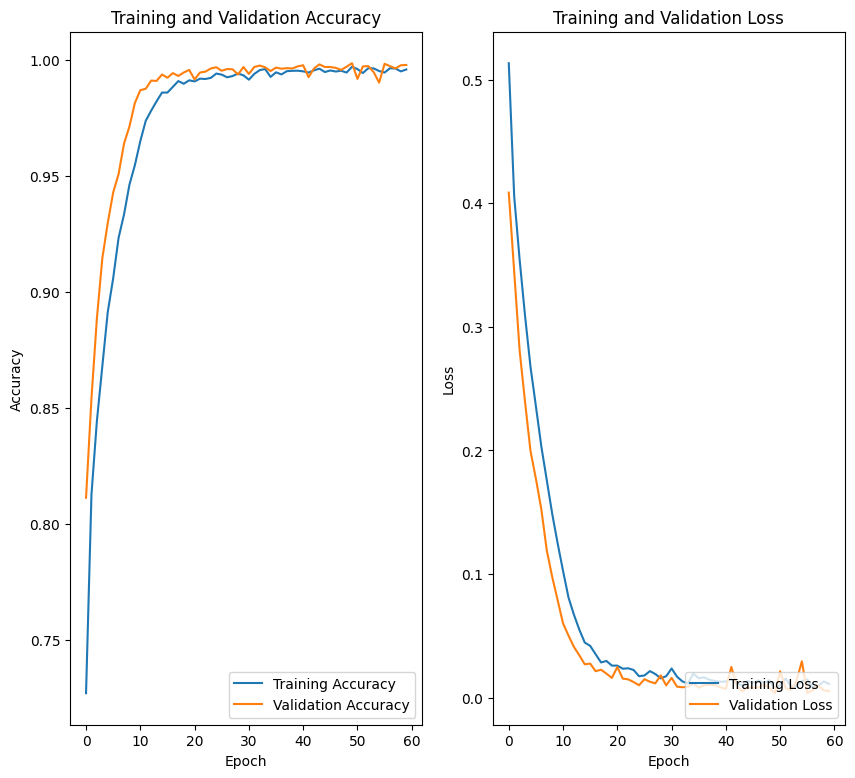

In [18]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
EPOCH = len(acc)

plt.figure(figsize=(10,9))
plt.subplot(1,2,1)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(range(EPOCH), acc, label='Training Accuracy')
plt.plot(range(EPOCH) , val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(EPOCH) , loss, label='Training Loss')
plt.plot(range(EPOCH), val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.show()

In [22]:
# predict
sample_review = ['I hate this phone', 'I hate spaghetti',
                'Everything was cold',
                'Everything was hot exactly as I did not want',
                'Everything was green',
                'the host seated us late',
                'they gave us no free chocolate cake',
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes',
                'does not work when I stand on my head']

sample_sequence = tokenizer.texts_to_sequences(sample_review)
sample_padding = pad_sequences(sample_sequence, maxlen=MAX_LEN, padding='post', truncating='post')

classes = model.predict(sample_padding)

for i in range(len(classes)):
  print(sample_review[i])
  print(classes[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
I hate this phone
[0.02819984]
I hate spaghetti
[0.01825361]
Everything was cold
[0.10318413]
Everything was hot exactly as I did not want
[0.05267052]
Everything was green
[0.10318413]
the host seated us late
[0.6413736]
they gave us no free chocolate cake
[0.1863906]
not sure about the wilted flowers on the table
[0.00424307]
only works when I stand on tippy toes
[0.9759087]
does not work when I stand on my head
[0.9688659]
